# **Correlation study notebook**

## Objectives

Answer business requirement 1:
* The client is interested in discovering how various house attributes correlate with the sale price. The client expects data visualizations of the correlated variables against the sale price to provide insights into these relationships.

## Inputs

* outputs/datasets/cleaned/house_prices_records_cleaned.csv

## Outputs

* Generate code that answers business requirement 1 and can be used to build Streamlit App

## Additional comments

Based on the analysis, the following attributes should be used for further building the ML pipeline:

1. **OverallQual**: Overall quality of the house.
2. **GrLivArea**: Above ground living area.
3. **GarageArea**: Garage area.
4. **TotalBsmtSF**: Total basement area.
5. **1stFlrSF**: First floor area.
6. **YearBuilt**: Year the house was built.
7. **YearRemodAdd**: Year the house was remodeled or added to.
8. **KitchenQual**: Kitchen quality.
9. **MasVnrArea**: Masonry veneer area.
10. **GarageYrBlt**: Year the garage was built.

These features have shown strong to moderate correlations with `SalePrice` and should be included in the ML pipeline for predicting house prices.

### Conclusions on hypothesis

1. **Overall Quality Matters**:
   - Higher overall quality ratings (`OverallQual`) are strongly associated with higher sale prices. This means that houses with better overall quality tend to sell for more.

2. **Living Area Matters**:
   - Larger above-ground living areas (`GrLivArea`) are strongly associated with higher sale prices. This means that houses with more living space tend to sell for more.

3. **Age of the House Matters**:
   - Newer houses (`YearBuilt`) are moderately associated with higher sale prices. This means that houses built more recently tend to sell for more, although the correlation is not as strong as with overall quality and living area.


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\-MY STUDY-\\Coding\\projects\\project-5\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\-MY STUDY-\\Coding\\projects\\project-5'

# Load Data

In [4]:
import pandas as pd

# Load the cleaned data
df_cleaned = pd.read_csv("outputs/datasets/cleaned/house_prices_records_cleaned.csv")

# Display the first few rows of the cleaned data
df_cleaned.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,548,RFn,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,460,RFn,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,608,RFn,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,0.0,3.0,No,216,ALQ,540,642,Unf,1998.0,...,9550,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,0.0,4.0,Av,655,GLQ,490,836,RFn,2000.0,...,14260,84.0,350.0,84,5,8,1145,2000,2000,250000


In [5]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1stFlrSF      1460 non-null   int64  
 1   2ndFlrSF      1460 non-null   float64
 2   BedroomAbvGr  1460 non-null   float64
 3   BsmtExposure  1460 non-null   object 
 4   BsmtFinSF1    1460 non-null   int64  
 5   BsmtFinType1  1460 non-null   object 
 6   BsmtUnfSF     1460 non-null   int64  
 7   GarageArea    1460 non-null   int64  
 8   GarageFinish  1460 non-null   object 
 9   GarageYrBlt   1460 non-null   float64
 10  GrLivArea     1460 non-null   int64  
 11  KitchenQual   1460 non-null   object 
 12  LotArea       1460 non-null   int64  
 13  LotFrontage   1460 non-null   float64
 14  MasVnrArea    1460 non-null   float64
 15  OpenPorchSF   1460 non-null   int64  
 16  OverallCond   1460 non-null   int64  
 17  OverallQual   1460 non-null   int64  
 18  TotalBsmtSF   1460 non-null 

* There are four categorical columns (`BsmtExposure`, `BsmtFinType1`, `GarageFinish`, and `KitchenQual`) that need to be encoded before conducting the correlation study.

In [6]:
# Encode categorical variables using one-hot encoding
categorical_columns = ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns)

* Next step we will calculate the correlation matrix using the `corr` method to understand the relationships between different variables.

* We will use a heatmap to visualize this matrix, highlighting the strength of relationships between variables.

* We will focus on `SalePrice` correlations to identify the most influential features

                  1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtFinSF1  BsmtUnfSF  \
1stFlrSF          1.000000 -0.184843      0.119940    0.445863   0.317987   
2ndFlrSF         -0.184843  1.000000      0.464390   -0.130006   0.007539   
BedroomAbvGr      0.119940  0.464390      1.000000   -0.097376   0.149465   
BsmtFinSF1        0.445863 -0.130006     -0.097376    1.000000  -0.495251   
BsmtUnfSF         0.317987  0.007539      0.149465   -0.495251   1.000000   
GarageArea        0.489782  0.131849      0.056942    0.296970   0.183303   
GarageYrBlt       0.224897  0.056154     -0.047435    0.148782   0.185610   
GrLivArea         0.566024  0.668139      0.497586    0.208171   0.240257   
LotArea           0.299475  0.058158      0.108042    0.214103  -0.002618   
LotFrontage       0.413773  0.080549      0.218136    0.214367   0.124098   
MasVnrArea        0.339850  0.162154      0.106666    0.261256   0.113862   
OpenPorchSF       0.211671  0.198790      0.080808    0.111761   0.129005   

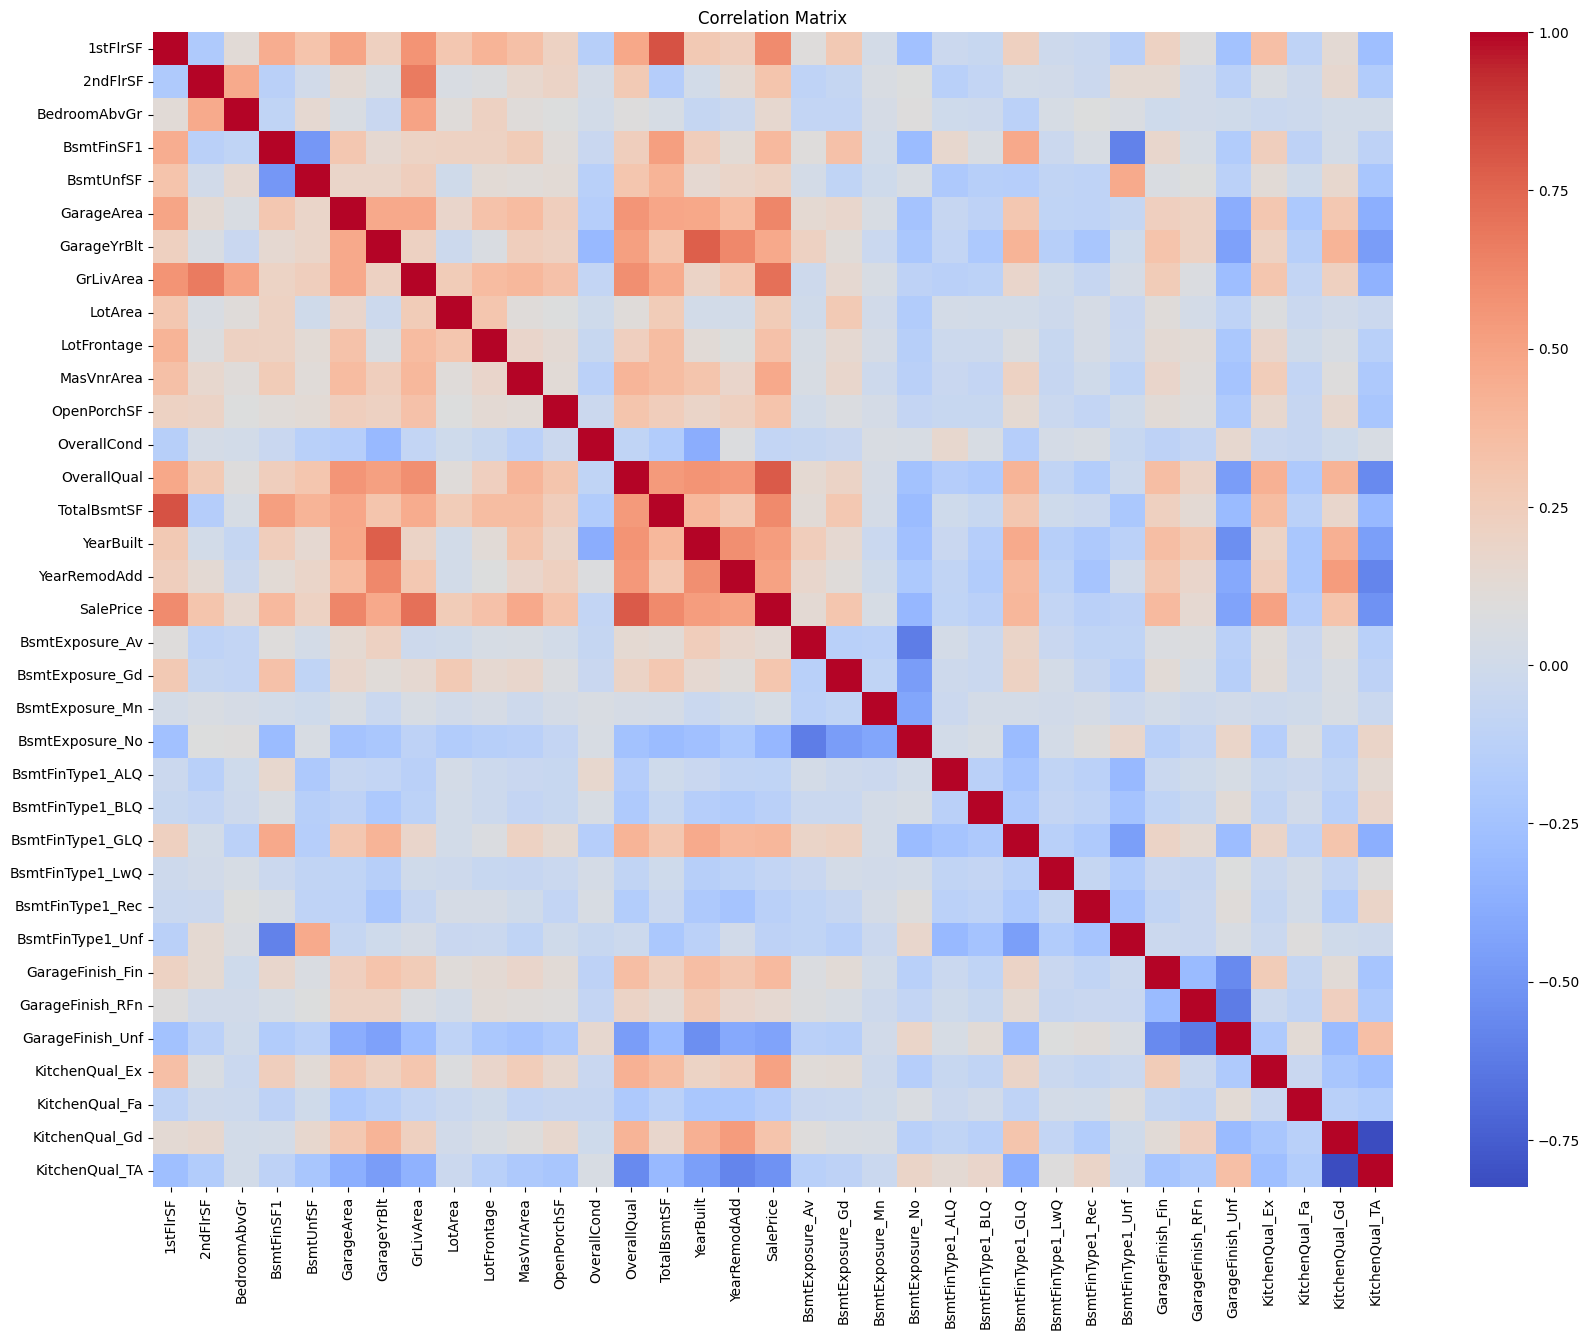


Correlation with SalePrice:
SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.708624
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
YearBuilt           0.522897
YearRemodAdd        0.507101
KitchenQual_Ex      0.504094
MasVnrArea          0.472614
GarageYrBlt         0.466754
BsmtFinType1_GLQ    0.400764
BsmtFinSF1          0.386420
GarageFinish_Fin    0.376918
LotFrontage         0.334771
KitchenQual_Gd      0.321641
OpenPorchSF         0.315856
2ndFlrSF            0.312479
BsmtExposure_Gd     0.307298
LotArea             0.263843
BsmtUnfSF           0.214479
BedroomAbvGr        0.155784
GarageFinish_RFn    0.148970
BsmtExposure_Av     0.136793
BsmtExposure_Mn     0.043493
OverallCond        -0.077856
BsmtFinType1_LwQ   -0.080126
BsmtFinType1_ALQ   -0.093107
BsmtFinType1_Unf   -0.108577
BsmtFinType1_Rec   -0.129630
BsmtFinType1_BLQ   -0.132420
KitchenQual_Fa     -0.157199
BsmtExposure_No    -0.319990
GarageFinish_U

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Focus on the correlation with SalePrice
saleprice_correlation = correlation_matrix['SalePrice'].sort_values(ascending=False)
print("\nCorrelation with SalePrice:")
print(saleprice_correlation)

* To study the relationships between variables and `SalePrice` we can also use Pearson and Sperman correlation methods.

Pearson Correlation Matrix:
                  1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtFinSF1  BsmtUnfSF  \
1stFlrSF          1.000000 -0.184843      0.119940    0.445863   0.317987   
2ndFlrSF         -0.184843  1.000000      0.464390   -0.130006   0.007539   
BedroomAbvGr      0.119940  0.464390      1.000000   -0.097376   0.149465   
BsmtFinSF1        0.445863 -0.130006     -0.097376    1.000000  -0.495251   
BsmtUnfSF         0.317987  0.007539      0.149465   -0.495251   1.000000   
GarageArea        0.489782  0.131849      0.056942    0.296970   0.183303   
GarageYrBlt       0.224897  0.056154     -0.047435    0.148782   0.185610   
GrLivArea         0.566024  0.668139      0.497586    0.208171   0.240257   
LotArea           0.299475  0.058158      0.108042    0.214103  -0.002618   
LotFrontage       0.413773  0.080549      0.218136    0.214367   0.124098   
MasVnrArea        0.339850  0.162154      0.106666    0.261256   0.113862   
OpenPorchSF       0.211671  0.198790      0.0808

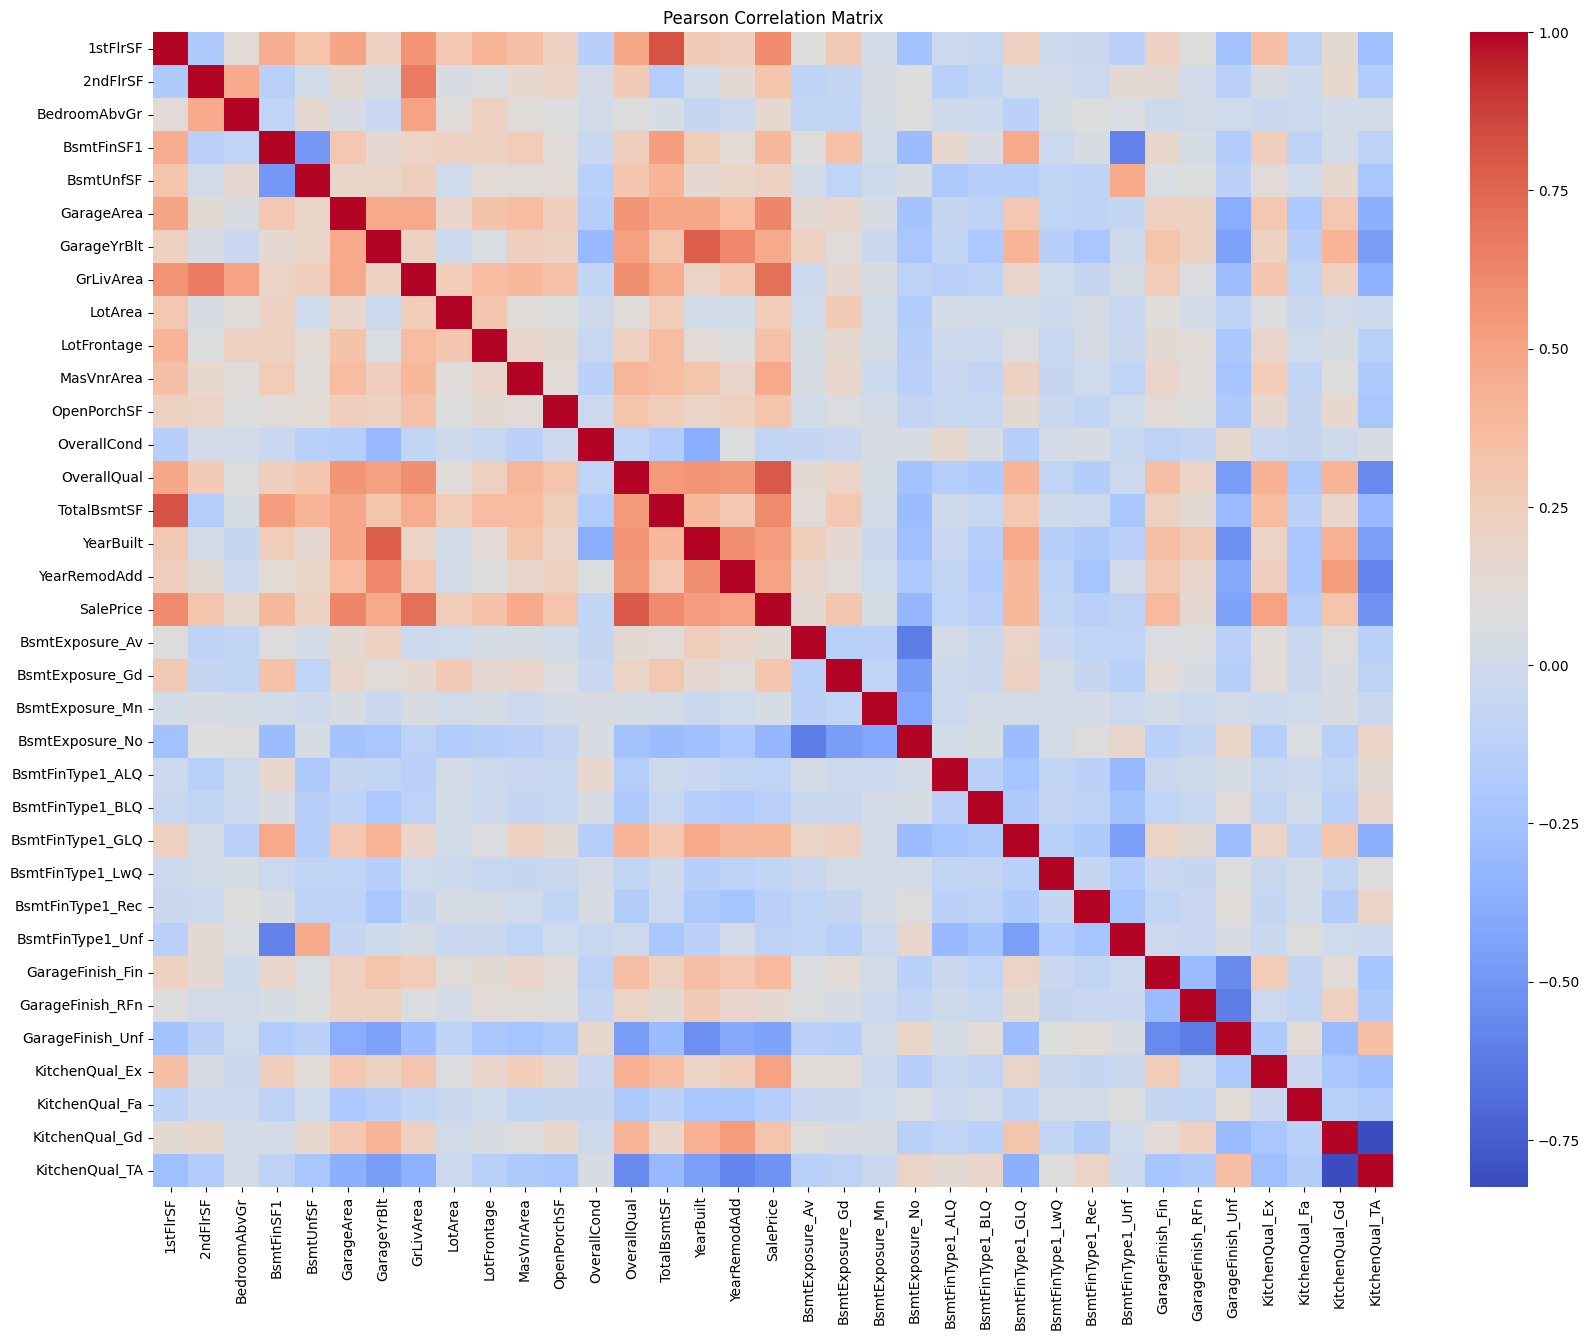


Pearson Correlation with SalePrice:
SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.708624
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
YearBuilt           0.522897
YearRemodAdd        0.507101
KitchenQual_Ex      0.504094
MasVnrArea          0.472614
GarageYrBlt         0.466754
BsmtFinType1_GLQ    0.400764
BsmtFinSF1          0.386420
GarageFinish_Fin    0.376918
LotFrontage         0.334771
KitchenQual_Gd      0.321641
OpenPorchSF         0.315856
2ndFlrSF            0.312479
BsmtExposure_Gd     0.307298
LotArea             0.263843
BsmtUnfSF           0.214479
BedroomAbvGr        0.155784
GarageFinish_RFn    0.148970
BsmtExposure_Av     0.136793
BsmtExposure_Mn     0.043493
OverallCond        -0.077856
BsmtFinType1_LwQ   -0.080126
BsmtFinType1_ALQ   -0.093107
BsmtFinType1_Unf   -0.108577
BsmtFinType1_Rec   -0.129630
BsmtFinType1_BLQ   -0.132420
KitchenQual_Fa     -0.157199
BsmtExposure_No    -0.319990
Garage

In [10]:
# Calculate the Pearson correlation matrix
pearson_corr_matrix = df_encoded.corr(method='pearson')

# Display the Pearson correlation matrix
print("Pearson Correlation Matrix:")
print(pearson_corr_matrix)

# Visualize the Pearson correlation matrix using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(pearson_corr_matrix, annot=False, cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

# Focus on the correlation with SalePrice for Pearson
pearson_saleprice_corr = pearson_corr_matrix['SalePrice'].sort_values(ascending=False)
print("\nPearson Correlation with SalePrice:")
print(pearson_saleprice_corr)


Spearman Correlation Matrix:
                  1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtFinSF1  BsmtUnfSF  \
1stFlrSF          1.000000 -0.260629      0.139575    0.323478   0.223652   
2ndFlrSF         -0.260629  1.000000      0.466895   -0.186416   0.059333   
BedroomAbvGr      0.139575  0.466895      1.000000   -0.069646   0.137414   
BsmtFinSF1        0.323478 -0.186416     -0.069646    1.000000  -0.573638   
BsmtUnfSF         0.223652  0.059333      0.137414   -0.573638   1.000000   
GarageArea        0.489797  0.086750      0.106090    0.244161   0.109167   
GarageYrBlt       0.214327  0.063678     -0.041252    0.071179   0.188903   
GrLivArea         0.494421  0.618068      0.524337    0.057471   0.253340   
LotArea           0.443858  0.124097      0.309843    0.171995   0.077830   
LotFrontage       0.384900  0.044487      0.275360    0.150312   0.097988   
MasVnrArea        0.348863  0.055262      0.123685    0.237541   0.074779   
OpenPorchSF       0.234713  0.222309      0.09

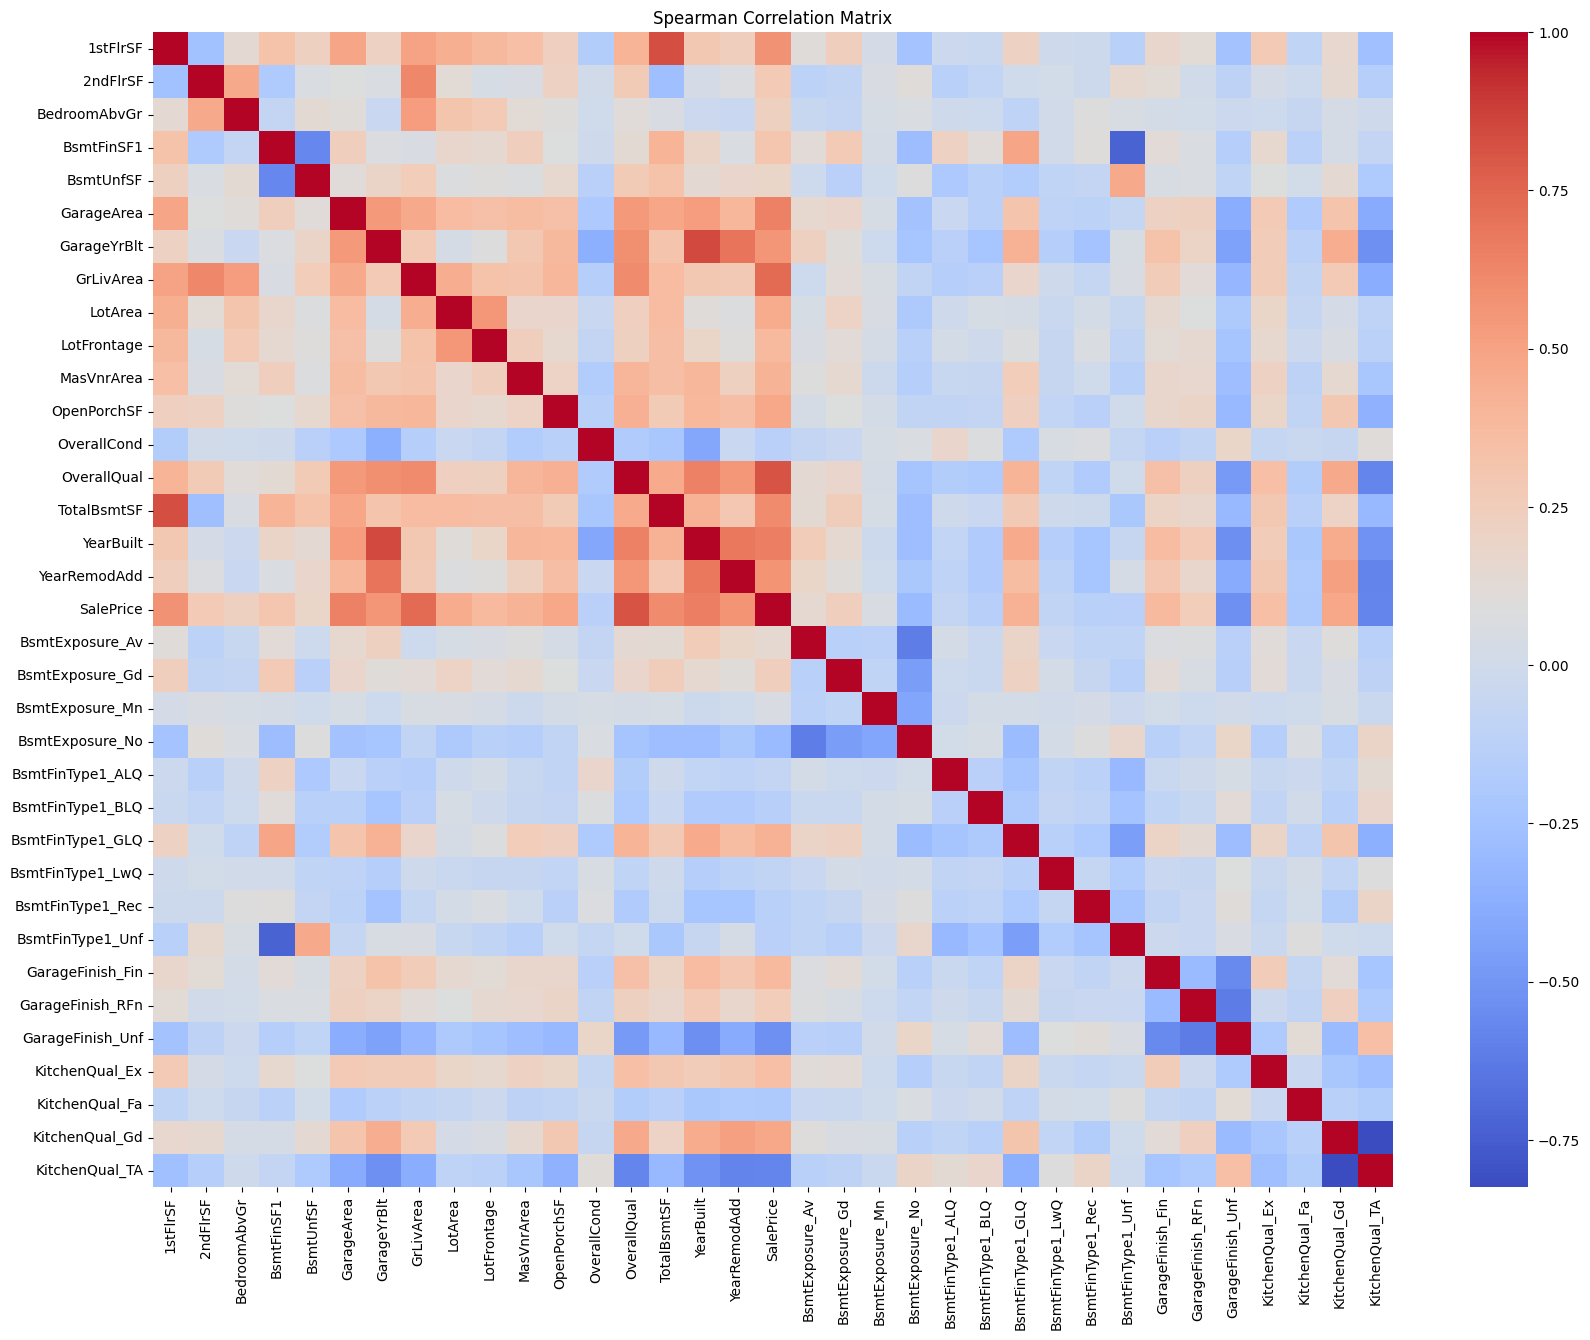


Spearman Correlation with SalePrice:
SalePrice           1.000000
OverallQual         0.809829
GrLivArea           0.731310
YearBuilt           0.652682
GarageArea          0.649379
TotalBsmtSF         0.602725
1stFlrSF            0.575408
YearRemodAdd        0.571159
GarageYrBlt         0.563256
KitchenQual_Gd      0.478583
OpenPorchSF         0.477561
LotArea             0.456461
BsmtFinType1_GLQ    0.423896
MasVnrArea          0.415906
LotFrontage         0.375590
GarageFinish_Fin    0.374053
KitchenQual_Ex      0.346387
BsmtFinSF1          0.301871
2ndFlrSF            0.279845
GarageFinish_RFn    0.255720
BsmtExposure_Gd     0.243258
BedroomAbvGr        0.223576
BsmtUnfSF           0.185197
BsmtExposure_Av     0.150432
BsmtExposure_Mn     0.055217
BsmtFinType1_ALQ   -0.076135
BsmtFinType1_LwQ   -0.088699
BsmtFinType1_Unf   -0.126862
OverallCond        -0.129325
BsmtFinType1_Rec   -0.137171
BsmtFinType1_BLQ   -0.143679
KitchenQual_Fa     -0.193429
BsmtExposure_No    -0.297598
Garag

In [11]:
# Calculate the Spearman correlation matrix
spearman_corr_matrix = df_encoded.corr(method='spearman')

# Display the Spearman correlation matrix
print("\nSpearman Correlation Matrix:")
print(spearman_corr_matrix)

# Visualize the Spearman correlation matrix using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(spearman_corr_matrix, annot=False, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

# Focus on the correlation with SalePrice for Spearman
spearman_saleprice_corr = spearman_corr_matrix['SalePrice'].sort_values(ascending=False)
print("\nSpearman Correlation with SalePrice:")
print(spearman_saleprice_corr)



* To make comparison of both correlation methods we can combine top 10 features

In [19]:
# Combine the top features from both methods into a single list
top_features = list(set(pearson_saleprice_corr.head(10).index).union(set(spearman_saleprice_corr.head(10).index)))

# Remove 'SalePrice' from the list of top features
if 'SalePrice' in top_features:
    top_features.remove('SalePrice')

# Create a DataFrame to compare the correlation values
comparison_df = pd.DataFrame({
    'Pearson': pearson_saleprice_corr[top_features],
    'Spearman': spearman_saleprice_corr[top_features]
})

# Sort the DataFrame by Pearson correlation in ascending order
comparison_df = comparison_df.sort_values(by='Pearson', ascending=False)

print("Top Features Correlated with SalePrice:")
print(comparison_df)

Top Features Correlated with SalePrice:
                 Pearson  Spearman
OverallQual     0.790982  0.809829
GrLivArea       0.708624  0.731310
GarageArea      0.623431  0.649379
TotalBsmtSF     0.613581  0.602725
1stFlrSF        0.605852  0.575408
YearBuilt       0.522897  0.652682
YearRemodAdd    0.507101  0.571159
KitchenQual_Ex  0.504094  0.346387
MasVnrArea      0.472614  0.415906
GarageYrBlt     0.466754  0.563256
KitchenQual_Gd  0.321641  0.478583


* For better visualisation we build a plot with comparison our correlation methods data

<Figure size 1400x800 with 0 Axes>

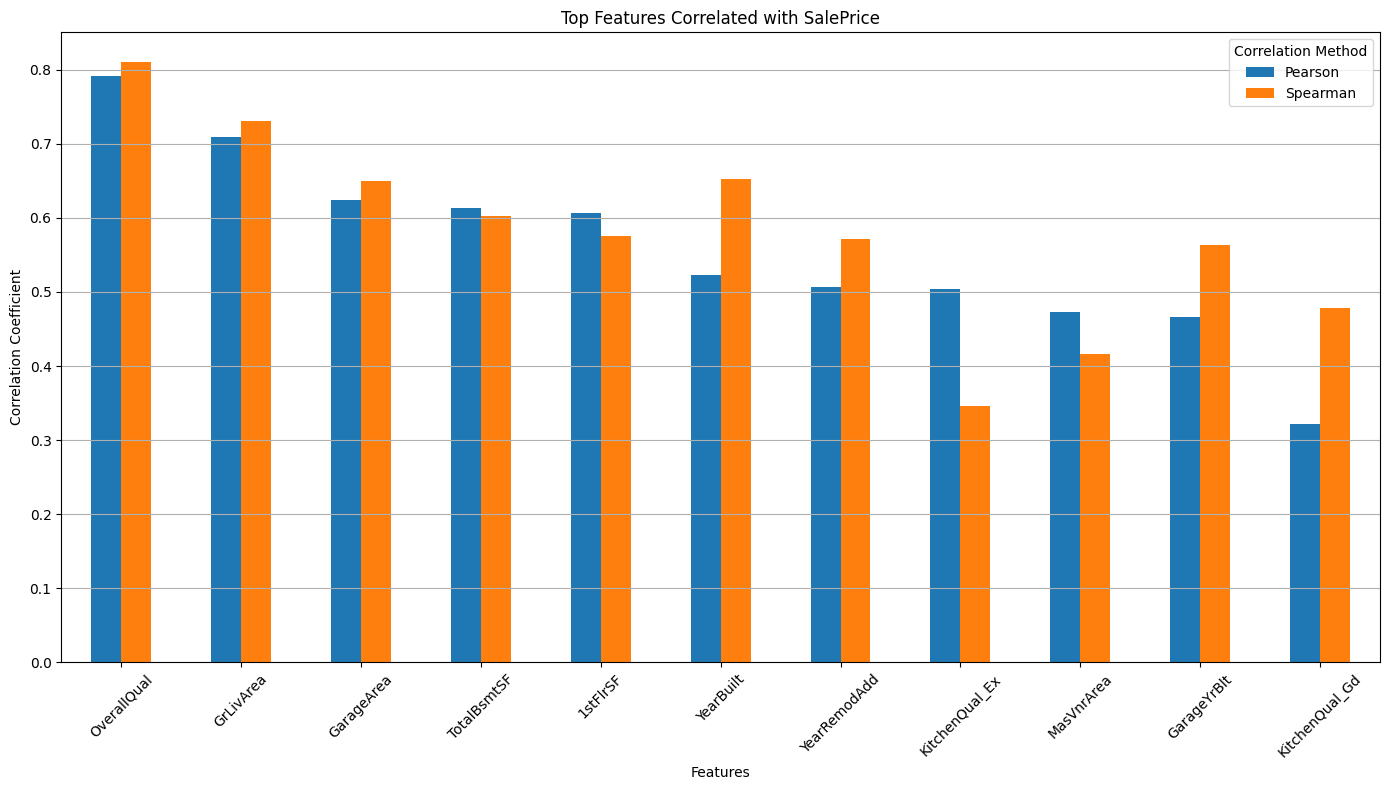

In [20]:
# Plot the comparison
plt.figure(figsize=(14, 8))
comparison_df.plot(kind='bar', figsize=(14, 8))
plt.title('Top Features Correlated with SalePrice')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.legend(title='Correlation Method')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

## Implementation of Hypotheses Validation

#### Hypothesis 1: Higher Overall Quality Leads to Higher Sale Prices
- **Hypothesis**: Houses with higher overall quality ratings (`OverallQual`) tend to have higher sale prices.
- **Validation**: Perform a correlation analysis between `OverallQual` and `SalePrice`. Create scatter plots and calculate the Pearson and Spearman correlation coefficients to validate the strength and direction of the relationship.


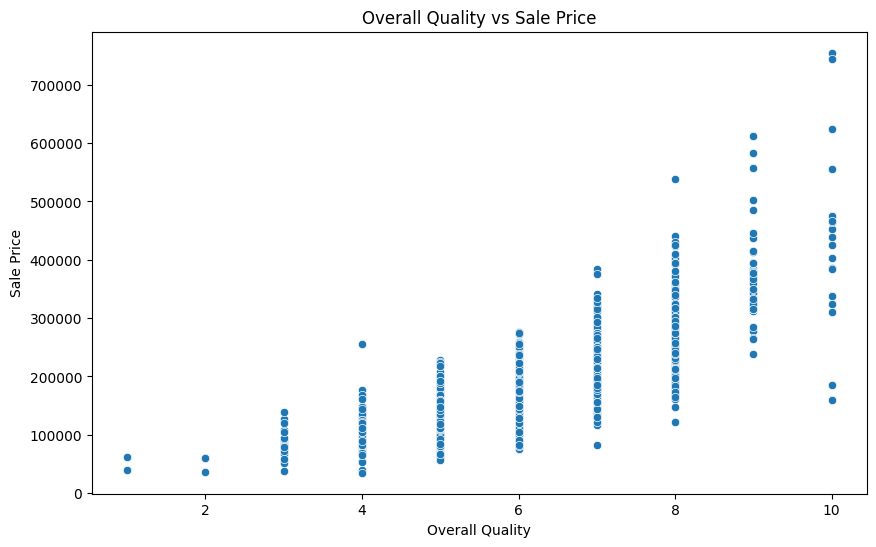

Pearson Correlation (OverallQual vs SalePrice): 0.7909816005838053
Spearman Correlation (OverallQual vs SalePrice): 0.8098285862017292


In [24]:
from scipy.stats import pearsonr, spearmanr

# Hypothesis 1: Higher Overall Quality Leads to Higher Sale Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='OverallQual', y='SalePrice', data=df_encoded)
plt.title('Overall Quality vs Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

pearson_corr_1, _ = pearsonr(df_encoded['OverallQual'], df_encoded['SalePrice'])
spearman_corr_1, _ = spearmanr(df_encoded['OverallQual'], df_encoded['SalePrice'])
print(f"Pearson Correlation (OverallQual vs SalePrice): {pearson_corr_1}")
print(f"Spearman Correlation (OverallQual vs SalePrice): {spearman_corr_1}")


#### Hypothesis 2: Larger Living Areas Result in Higher Sale Prices
- **Hypothesis**: Houses with larger above-ground living areas (`GrLivArea`) tend to have higher sale prices.
- **Validation**: Perform a correlation analysis between `GrLivArea` and `SalePrice`. Create scatter plots and calculate the Pearson and Spearman correlation coefficients to validate the strength and direction of the relationship.

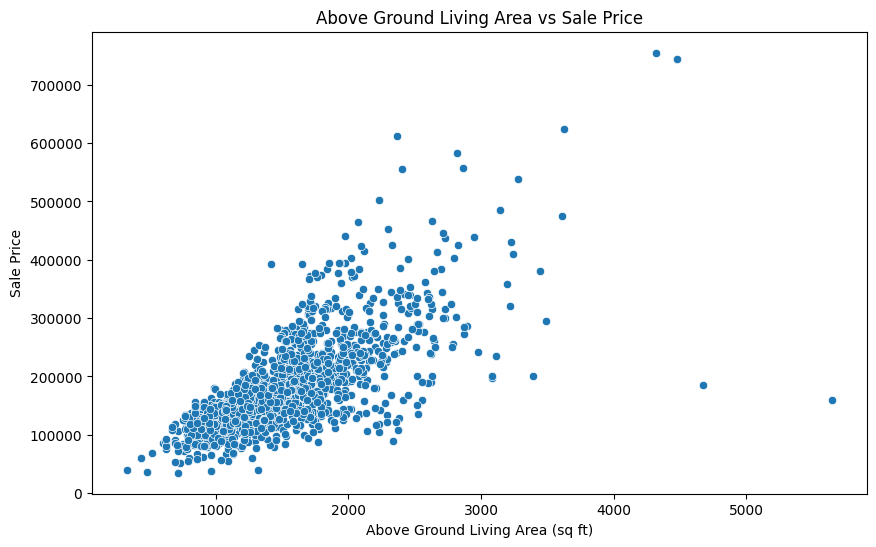

Pearson Correlation (GrLivArea vs SalePrice): 0.7086244776126522
Spearman Correlation (GrLivArea vs SalePrice): 0.7313095834659141


In [25]:
# Hypothesis 2: Larger Living Areas Result in Higher Sale Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_encoded)
plt.title('Above Ground Living Area vs Sale Price')
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()

pearson_corr_2, _ = pearsonr(df_encoded['GrLivArea'], df_encoded['SalePrice'])
spearman_corr_2, _ = spearmanr(df_encoded['GrLivArea'], df_encoded['SalePrice'])
print(f"Pearson Correlation (GrLivArea vs SalePrice): {pearson_corr_2}")
print(f"Spearman Correlation (GrLivArea vs SalePrice): {spearman_corr_2}")


#### Hypothesis 3: Newer Houses Have Higher Sale Prices
- **Hypothesis**: Newer houses (houses built more recently) tend to have higher sale prices.
- **Validation**: Perform a correlation analysis between `YearBuilt` and `SalePrice`. Create scatter plots and calculate the Pearson and Spearman correlation coefficients to validate the strength and direction of the relationship.

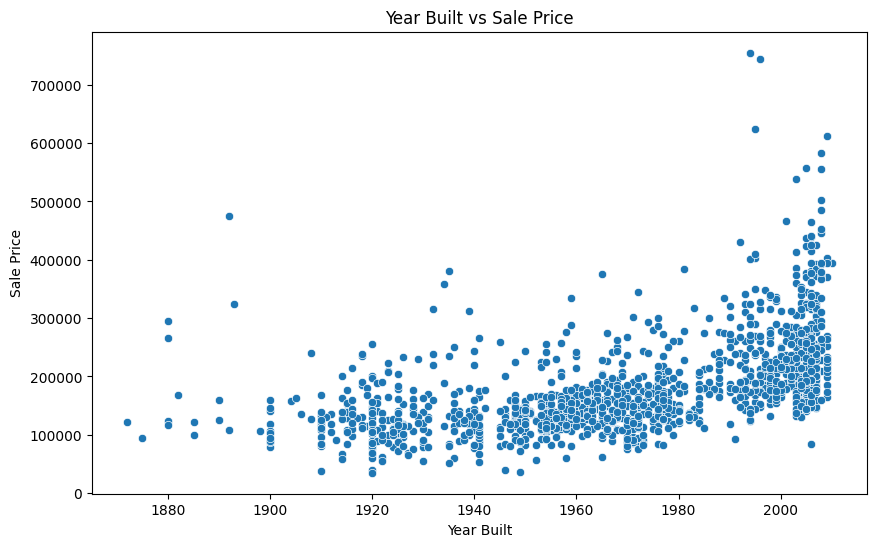

Pearson Correlation (YearBuilt vs SalePrice): 0.522897332879497
Spearman Correlation (YearBuilt vs SalePrice): 0.6526815462850586


In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df_encoded)
plt.title('Year Built vs Sale Price')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.show()

pearson_corr_3, _ = pearsonr(df_encoded['YearBuilt'], df_encoded['SalePrice'])
spearman_corr_3, _ = spearmanr(df_encoded['YearBuilt'], df_encoded['SalePrice'])
print(f"Pearson Correlation (YearBuilt vs SalePrice): {pearson_corr_3}")
print(f"Spearman Correlation (YearBuilt vs SalePrice): {spearman_corr_3}")

---

# Conclusions

* Strong Positive Correlations:

`OverallQual`: Both Pearson (0.790982) and Spearman (0.809829) correlations show that it has the strongest positive correlation with `SalePrice`. This indicates that the overall quality of the house is a significant predictor of its price.

`GrLivArea`: Both Pearson (0.708624) and Spearman (0.731310) correlations show that `GrLivArea` (above ground living area) is another strong predictor of `SalePrice`.

`GarageArea`: Both Pearson (0.623431) and Spearman (0.649379) correlations indicate that the garage area is an important factor affecting the sale price.

`TotalBsmtSF`: Both Pearson (0.613581) and Spearman (0.602725) correlations show that the total basement area is a significant predictor of `SalePrice`.

* Moderate Positive Correlations:

`1stFlrSF`: Both Pearson (0.605852) and Spearman (0.575408) correlations indicate that the first floor area is moderately correlated with `SalePrice`.

`YearBuilt`: Pearson (0.522897) and Spearman (0.652682) correlations show that the year the house was built is an important factor, with Spearman indicating a stronger monotonic relationship.

`YearRemodAdd`: Pearson (0.507101) and Spearman (0.571159) correlations indicate that the year the house was remodeled or added to is moderately correlated with `SalePrice`.

`KitchenQual_Ex`: Pearson (0.504094) and Spearman (0.346387) correlations show that excellent kitchen quality is a significant predictor, with Pearson indicating a stronger linear relationship.

`MasVnrArea`: Pearson (0.472614) and Spearman (0.415906) correlations indicate that the masonry veneer area is moderately correlated with `SalePrice`.

`GarageYrBlt`: Pearson (0.466754) and Spearman (0.563256) correlations show that the year the garage was built is an important factor, with Spearman indicating a stronger monotonic relationship.

`KitchenQual_Gd`: Pearson (0.321641) and Spearman (0.478583) correlations indicate that good kitchen quality is moderately correlated with `SalePrice`, with Spearman indicating a stronger monotonic relationship.
